In [261]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame as DF
from sympy import diff
from sympy.abc import x,y
from sympy import cos
from sympy import *
from sympy import lambdify

### Set display of pandas dataframes and Series to 11 decimal places

In [262]:
pd.set_option("display.precision", 11)

## Define Hamiltonian

Use the given lagrangian in the pdf to calculate the Hamiltonian using the definition.

H = $\sum (p_i * \text{q_dot_i}) - L$

where $p_i = \frac{\partial L}{\partial \text{q_dot_i}}$.

In this case the Lagrangian $L = L_0 + L_2$, with $L_0$ being a term with no q_dot_i dependence and $L_2$ having quadratic q_dot_i dependence. Then the Hamiltonian equals $H = -L_O + L_2$. This is how the Hamiltonian is defined below.

This was done using Mathematica.

In [263]:
def H(x_1, x_2, y_1, y_2, p_x_1, p_x_2, p_y_1, p_y_2, p_x_dot_1, p_x_dot_2, p_y_dot_1, p_y_dot_2, Lambda_1, Lambda_2):
    
    L_0 = ( -x_1**2/2 - 1/2*Lambda_2**2*x_1**6 - Lambda_2*x_1**3*x_2 - 
            x_2**2/2 - Lambda_1*x_1*x_2**3 - 1/2*Lambda_1**2 * x_2**6 -
            y_1**2/2 - 3/2*Lambda_2**2*x_1**4*y_1**2 + 3*Lambda_2*x_1*x_2*y_1**2 -
            3/2*Lambda_2**2*x_1**2*y_1**4 - 1/2*Lambda_2**2*y_1**6 -
            3*Lambda_2*x_1**2*y_1*y_2 - 3*Lambda_1*x_2**2*y_1*y_2 + Lambda_2*y_1**3*y_2 -
            y_2**2/2 + 3*Lambda_1*x_1*x_2*y_2**2 - 3/2*Lambda_1**2*x_2**4*y_2**2 +
            Lambda_1*y_1*y_2**3 - 3/2*Lambda_1**2*x_2**2*y_2**4 - 
                1/2*Lambda_1**2*y_2**6)
            
    
    L_2 = 1/2*(p_x_1**2 + p_y_1**2) + 1/2*(p_x_2**2 + p_y_2**2)
    
    return -L_0 + L_2

### Simulation

In [264]:
labels = ["x_1", "x_2", "y_1", "y_2", 
               "p_x_1", "p_x_2", "p_y_1", "p_y_2", 
               "p_x_dot_1", "p_x_dot_2", "p_y_dot_1", "p_y_dot_2"]

## Simulation with Sympy

Turn the Hamiltonian as already defined into a sympy function. The sympy package can do symbolic manipulation well so differentiate the Hamiltonian to get the canonical equations with sympy

Turn the coordinates into sympy symbols

In [265]:
x_1, x_2, y_1, y_2, p_x_1, p_x_2, p_y_1, p_y_2, p_x_dot_1, p_x_dot_2, p_y_dot_1, p_y_dot_2, Lambda_1, Lambda_2 = symbols(
"x_1, x_2, y_1, y_2, p_x_1, p_x_2, p_y_1, p_y_2, p_x_dot_1, p_x_dot_2, p_y_dot_1, p_y_dot_2, Lambda_1, Lambda_2")

In [266]:
Hi = H(x_1, x_2, y_1, y_2, p_x_1, p_x_2, p_y_1, p_y_2, p_x_dot_1, p_x_dot_2, p_y_dot_1, p_y_dot_2, Lambda_1, Lambda_2)
Hi

0.5*Lambda_1**2*x_2**6 + 1.5*Lambda_1**2*x_2**4*y_2**2 + 1.5*Lambda_1**2*x_2**2*y_2**4 + 0.5*Lambda_1**2*y_2**6 + Lambda_1*x_1*x_2**3 - 3*Lambda_1*x_1*x_2*y_2**2 + 3*Lambda_1*x_2**2*y_1*y_2 - Lambda_1*y_1*y_2**3 + 0.5*Lambda_2**2*x_1**6 + 1.5*Lambda_2**2*x_1**4*y_1**2 + 1.5*Lambda_2**2*x_1**2*y_1**4 + 0.5*Lambda_2**2*y_1**6 + Lambda_2*x_1**3*x_2 + 3*Lambda_2*x_1**2*y_1*y_2 - 3*Lambda_2*x_1*x_2*y_1**2 - Lambda_2*y_1**3*y_2 + 0.5*p_x_1**2 + 0.5*p_x_2**2 + 0.5*p_y_1**2 + 0.5*p_y_2**2 + x_1**2/2 + x_2**2/2 + y_1**2/2 + y_2**2/2

In [267]:
H(3,4,5,6,7,8,9,10,11,0,0,0,1,2)

146894.0

Differentiate the Hamiltonian.

In [268]:
Hi_x_1 = Hi.diff(x_1).simplify()
Hi_x_2 = Hi.diff(x_2).simplify()
Hi_y_1 = Hi.diff(y_1).simplify()
Hi_y_2 = Hi.diff(y_2).simplify()
Hi_p_x_1 = Hi.diff(p_x_1).simplify()
Hi_p_x_2 = Hi.diff(p_x_2).simplify()
Hi_p_y_1 = Hi.diff(p_y_1).simplify()
Hi_p_y_2 = Hi.diff(p_y_2).simplify()

Use lambdify() to turn the differentiated sympy equations back into python equations that I can actually put variables into.

In [269]:
dHi_x_1 = lambdify((x_1, x_2, y_1, y_2, Lambda_1, Lambda_2),Hi_x_1)
dHi_x_2 = lambdify((x_1, x_2, y_1, y_2, Lambda_1, Lambda_2),Hi_x_2)
dHi_y_1 = lambdify((x_1, x_2, y_1, y_2, Lambda_1, Lambda_2),Hi_y_1)
dHi_y_2 = lambdify((x_1, x_2, y_1, y_2, Lambda_1, Lambda_2),Hi_y_2)
dHi_p_x_1 = lambdify((x_1, x_2, y_1, y_2, p_x_1, p_x_2, p_y_1, p_y_2, p_x_dot_1, p_x_dot_2, p_y_dot_1, p_y_dot_2, Lambda_1, Lambda_2),Hi_p_x_1)
dHi_p_x_2 = lambdify((x_1, x_2, y_1, y_2, p_x_1, p_x_2, p_y_1, p_y_2, p_x_dot_1, p_x_dot_2, p_y_dot_1, p_y_dot_2, Lambda_1, Lambda_2),Hi_p_x_2)
dHi_p_y_1 = lambdify((x_1, x_2, y_1, y_2, p_x_1, p_x_2, p_y_1, p_y_2, p_x_dot_1, p_x_dot_2, p_y_dot_1, p_y_dot_2, Lambda_1, Lambda_2),Hi_p_y_1)
dHi_p_y_2 = lambdify((x_1, x_2, y_1, y_2, p_x_1, p_x_2, p_y_1, p_y_2, p_x_dot_1, p_x_dot_2, p_y_dot_1, p_y_dot_2, Lambda_1, Lambda_2),Hi_p_y_2)


Check that the symmetry of the Hamiltonian if Lambda_1 = Lambda_2 holds. If it does then differentiating with respect to x_1 
should be the same as differentiating with respect to x_2.

In [270]:
-dHi_x_1(.3, .3, .3, .3, 0.01, 0.01)

-dHi_x_2(.3, .3, .3, .3, 0.01, 0.01) == -dHi_x_1(.3, .3, .3, .3, 0.01, 0.01)


True

In [271]:
-dHi_y_2(.3, .3, .3, .3, 0.01, 0.01) == -dHi_y_1(.3, .3, .3, .3, 0.01, 0.01)


True

#### Redo simulation with sympy definitions

In [272]:
def simulation_alt(x_1, x_2, y_1, y_2, 
               p_x_1, p_x_2, p_y_1, p_y_2, Lambda_1, Lambda_2, delta_t):
    
    
    # The rates of change of momenta are linked to the coordinates by the Hamiltonian canonical equations
    # Calculate them.
        
    p_x_dot_1 = -dHi_x_1(x_1, x_2, y_1, y_2, Lambda_1, Lambda_2)
    
    
    p_x_dot_2 = -dHi_x_2(x_1, x_2, y_1, y_2, Lambda_1, Lambda_2)
    
    p_y_dot_1 = -dHi_y_1(x_1, x_2, y_1, y_2, Lambda_1, Lambda_2)

    p_y_dot_2 = -dHi_y_2(x_1, x_2, y_1, y_2, Lambda_1, Lambda_2)
    
    labels = ["x_1", "x_2", "y_1", "y_2", 
               "p_x_1", "p_x_2", "p_y_1", "p_y_2", 
               "p_x_dot_1", "p_x_dot_2", "p_y_dot_1", "p_y_dot_2"]
    
    i = 0

    # Define number of steps between measurement recordings
    record_steps = 1


    # Initial coordinates 
    old_coordinates = [x_1, x_2, y_1, y_2, 
               p_x_1, p_x_2, p_y_1, p_y_2, 
               p_x_dot_1, p_x_dot_2, p_y_dot_1, p_y_dot_2]

    # Coordinates list to record simulation dynamics
    global coordinates_list
    coordinates_list = [[x_1], [x_2], [y_1], [y_2], 
               [p_x_1], [p_x_2], [p_y_1], [p_y_2], 
               [p_x_dot_1], [p_x_dot_2], [p_y_dot_1], [p_y_dot_2]]


    simulation_repetitions = 100000
    
    # Repeating algorithm
    while i < simulation_repetitions:
        
        # Define old variables
        [x_1_old, x_2_old, y_1_old, y_2_old, p_x_1_old, p_x_2_old, p_y_1_old, p_y_2_old, p_x_dot_1_old,
         p_x_dot_2_old, p_y_dot_1_old, p_y_dot_2_old] = old_coordinates
        
        
        # b) velocity Verlet 1 to get new positions from old positions, momentums and rate of change of momentums
        
        x_1_new = (x_1_old + p_x_1_old * delta_t + 1/2 * p_x_dot_1_old * delta_t**2)
        x_2_new = (x_2_old + p_x_2_old * delta_t + 1/2 * p_x_dot_2_old * delta_t**2)
        y_1_new = (y_1_old + p_y_1_old * delta_t + 1/2 * p_y_dot_1_old * delta_t**2)
        y_2_new = (y_2_old + p_y_2_old * delta_t + 1/2 * p_y_dot_2_old * delta_t**2)

        
        # c) Use Hamiltonian canonical equations to get new p_dot values
        
        p_x_dot_1_new = -dHi_x_1(x_1_new, x_2_new, y_1_new, y_2_new, Lambda_1, Lambda_2)
    
        p_x_dot_2_new = -dHi_x_2(x_1_new, x_2_new, y_1_new, y_2_new, Lambda_1, Lambda_2)
    
        p_y_dot_1_new = -dHi_y_1(x_1_new, x_2_new, y_1_new, y_2_new, Lambda_1, Lambda_2)

        p_y_dot_2_new = -dHi_y_2(x_1_new, x_2_new, y_1_new, y_2_new, Lambda_1, Lambda_2)


        # d) Use Velocity Verlet 2 to get new momentums

        p_x_1_new = (p_x_1_old + (1/2) * (p_x_dot_1_new + p_x_dot_1_old) * delta_t)
        p_x_2_new = (p_x_2_old + (1/2) * (p_x_dot_2_new + p_x_dot_2_old) * delta_t)
        p_y_1_new = (p_y_1_old + (1/2) * (p_y_dot_1_new + p_y_dot_1_old) * delta_t)
        p_y_2_new = (p_y_2_old + (1/2) * (p_y_dot_2_new + p_y_dot_2_old) * delta_t)

        new_coordinates = [x_1_new, x_2_new, y_1_new, y_2_new, 
                           p_x_1_new, p_x_2_new, p_y_1_new, p_y_2_new,
                           p_x_dot_1_new, p_x_dot_2_new, p_y_dot_1_new, p_y_dot_2_new]
        
        
        # Recording position, momentum, and rate of change of momentum every 10th step
        if i % record_steps == 0:
            h = 0

            while h < len(coordinates_list):
                coordinates_list[h].append(new_coordinates[h])
                h += 1
                
                
        # Update new coordinates

        old_coordinates = new_coordinates

        i += 1
    global times
    times = np.arange(0,simulation_repetitions*delta_t + delta_t*record_steps, delta_t*record_steps)
    
    coords_dict = {"times" : times, labels[0] : coordinates_list[0], labels[0] : coordinates_list[0], 
                  labels[1] : coordinates_list[1], labels[2] : coordinates_list[2], labels[3] : coordinates_list[3], 
                  labels[4] : coordinates_list[4], labels[5] : coordinates_list[5], labels[6] : coordinates_list[6], 
                  labels[7] : coordinates_list[7], labels[8] : coordinates_list[8], labels[9] : coordinates_list[9], 
                  labels[10] : coordinates_list[10], labels[11] : coordinates_list[11]}
    
    global Coords
    Coords = DF(coords_dict, index = coords_dict["times"], columns = labels)
    return Coords

In [273]:
print(H_conserved(Particle_1, .0001, .0002))

0.000      4438.05021900330
0.001      4438.05021941426
0.002      4438.05021982557
0.003      4438.05022023722
0.004      4438.05022064921
                 ...       
99.996     4438.05050277791
99.997     4438.05050422930
99.998     4438.05050568359
99.999     4438.05050714078
100.000    4438.05050860087
Length: 100001, dtype: float64


### Do two trajectories and check their chaotic nature

In [274]:
10e-4

0.001

In [275]:
Particle_1 = simulation_alt(23, -9.92, 2, -11.01, -10.5, 80, 40.7, -0.6, .0001, .0002, 10e-4)
Particle_2 = simulation_alt(23.1, -9.92, 2, -11.01, -10.5, 80, 40.7, -0.6, .0001, .0002, 10e-4)

In [276]:
Particle_1

,x_1,x_2,y_1,y_2,p_x_1,p_x_2,p_y_1,p_y_2,p_x_dot_1,p_x_dot_2,p_y_dot_1,p_y_dot_2
0.000,23.00000000000,-9.92000000000,2.00000000000,-11.01000000000,-10.50000000000,80.00000000000,40.70000000000,-0.60000000000,-20.31466550880,7.58250646393,1.04395764910,11.91364546458
0.001,22.98948984267,-9.83999620875,2.04070052198,-11.01059404318,-10.52031695250,80.00754979700,40.70101510390,-0.58809803572,-20.31923948878,7.51708753513,0.98625014958,11.89028308829
0.002,22.97895936610,-9.75998490041,2.08140203021,-11.01117619607,-10.54063844074,80.01503416985,40.70197259948,-0.57621940570,-20.32373699348,7.45165817380,0.92874101739,11.86697696304
0.003,22.96840856579,-9.67996614041,2.12210446718,-11.01174648199,-10.56096438813,80.02245310811,40.70287268506,-0.56436405380,-20.32815779064,7.38621834009,0.87143014655,11.84372684143
0.004,22.95783743732,-9.59993999419,2.16280777558,-11.01230492418,-10.58129471785,80.02980660128,40.70371555885,-0.55253192414,-20.33250164819,7.32076799519,0.81431742891,11.82053247556
...,...,...,...,...,...,...,...,...,...,...,...,...
99.996,-24.39734661134,-16.29557724802,28.00474835699,46.31375995822,-34.06677711761,-50.74223602609,-40.05381655749,10.08264221599,56.03936548786,9.48559571403,-9.54179632508,-33.15842245048
99.997,-24.43138536877,-16.34631474125,27.96468976954,46.32382602122,-34.01071608753,-50.73269798615,-40.06337287110,10.04946481182,56.08269467636,9.59048417823,-9.57083089655,-33.19638588162
99.998,-24.46536804351,-16.39704264399,27.92462161125,46.33385888784,-33.95461178661,-50.72305500342,-40.07295831144,10.01624952652,56.12590717185,9.69548128609,-9.60004978066,-33.23418473281
99.999,-24.49929459234,-16.44776085126,27.88454385292,46.34385852027,-33.89846433165,-50.71330696955,-40.08257306274,9.98299652471,56.16900274285,9.80058645547,-9.62945281230,-33.27181887825


Check that the Hamiltonian is conserved

In [277]:
def H_conserved(Particle_1, Lambda_1, Lambda_2):
    
    K = H(Particle_1[labels[0]], Particle_1[labels[1]], Particle_1[labels[2]], Particle_1[labels[3]], Particle_1[labels[4]],
          Particle_1[labels[5]], Particle_1[labels[6]], Particle_1[labels[7]], Particle_1[labels[8]], Particle_1[labels[9]], 
          Particle_1[labels[10]], Particle_1[labels[11]], Lambda_1, Lambda_2)
    
    return K

In [278]:
print(H_conserved(Particle_1, .0001, .0002), H_conserved(Particle_1, .0001, .0002)) 

0.000      4438.05021900330
0.001      4438.05021941426
0.002      4438.05021982557
0.003      4438.05022023722
0.004      4438.05022064921
                 ...       
99.996     4438.05050277791
99.997     4438.05050422930
99.998     4438.05050568359
99.999     4438.05050714078
100.000    4438.05050860087
Length: 100001, dtype: float64 0.000      4438.05021900330
0.001      4438.05021941426
0.002      4438.05021982557
0.003      4438.05022023722
0.004      4438.05022064921
                 ...       
99.996     4438.05050277791
99.997     4438.05050422930
99.998     4438.05050568359
99.999     4438.05050714078
100.000    4438.05050860087
Length: 100001, dtype: float64


### Plot trajectories of both points

Text(0, 0.5, 'p_y_2')

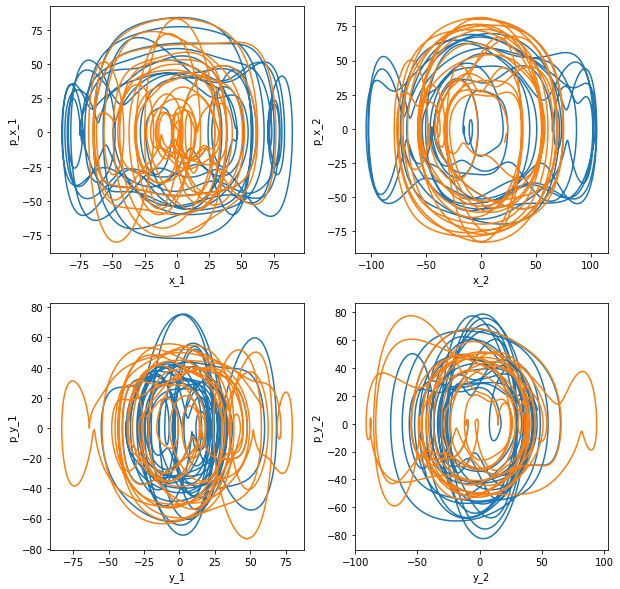

In [279]:
plt.figure(figsize = (10,10))

plt.subplot(2,2,1)
plt.plot(Particle_1["x_1"], Particle_1["p_x_1"])
plt.plot(Particle_2["x_1"], Particle_2["p_x_1"])
plt.xlabel("x_1")
plt.ylabel("p_x_1")

plt.subplot(2,2,2)
plt.plot(Particle_1["x_2"], Particle_1["p_x_2"])
plt.plot(Particle_2["x_2"], Particle_2["p_x_2"])
plt.xlabel("x_2")
plt.ylabel("p_x_2")

plt.subplot(2,2,3)
plt.plot(Particle_1["y_1"], Particle_1["p_y_1"])
plt.plot(Particle_2["y_1"], Particle_2["p_y_1"])
plt.xlabel("y_1")
plt.ylabel("p_y_1")

plt.subplot(2,2,4)
plt.plot(Particle_1["y_2"], Particle_1["p_y_2"])
plt.plot(Particle_2["y_2"], Particle_2["p_y_2"])
plt.xlabel("y_2")
plt.ylabel("p_y_2")

Text(0, 0.5, 'p_y_2')

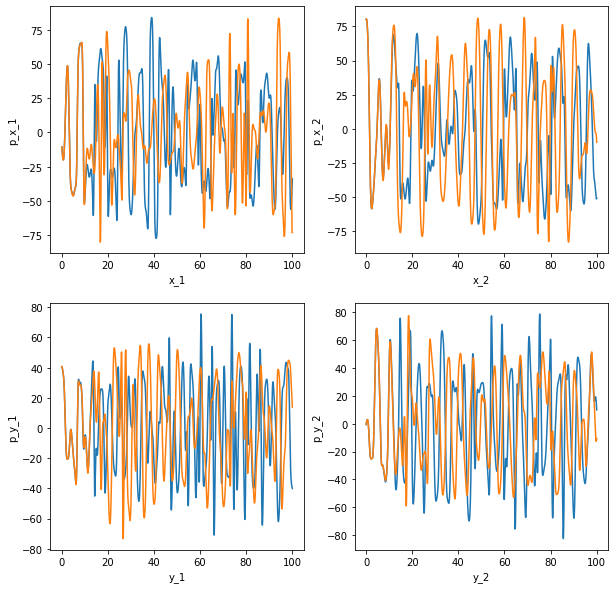

In [280]:
plt.figure(figsize = (10,10))

plt.subplot(2,2,1)
plt.plot(times, Particle_1["p_x_1"])
plt.plot(times, Particle_2["p_x_1"])
plt.xlabel("x_1")
plt.ylabel("p_x_1")

plt.subplot(2,2,2)
plt.plot(times, Particle_1["p_x_2"])
plt.plot(times, Particle_2["p_x_2"])
plt.xlabel("x_2")
plt.ylabel("p_x_2")

plt.subplot(2,2,3)
plt.plot(times, Particle_1["p_y_1"])
plt.plot(times, Particle_2["p_y_1"])
plt.xlabel("y_1")
plt.ylabel("p_y_1")

plt.subplot(2,2,4)
plt.plot(times, Particle_1["p_y_2"])
plt.plot(times, Particle_2["p_y_2"])
plt.xlabel("y_2")
plt.ylabel("p_y_2")

## Check validity of simulation in time

1. Simulate the same dynamics with two different time steps, say
10^{-4} and 5*10^{-1}.
It is useful to check when they start diverging, that way we know
when we stop trusting the simulation.

In [281]:
print(10e-4, 5e-1)

0.001 0.5


In [282]:
time_step_1 = simulation_alt(23, -9.92, 2, -11.01, -10.5, 80, 40.7, -0.6, .0001, .0002, 0.0001)
print(H_conserved(time_step_1, .0001, .0002))


time_step_2 = simulation_alt(23, -9.92, 2, -11.01, -10.5, 80, 40.7, -0.6, .0001, .0002, 0.0005)
print(H_conserved(time_step_2, .0001, .0002))

0.0000     4438.05021900330
0.0001     4438.05021900371
0.0002     4438.05021900412
0.0003     4438.05021900453
0.0004     4438.05021900494
                 ...       
9.9996     4438.05021828229
9.9997     4438.05021828230
9.9998     4438.05021828232
9.9999     4438.05021828233
10.0000    4438.05021828234
Length: 100001, dtype: float64
0.0000     4438.05021900330
0.0005     4438.05021905466
0.0010     4438.05021910604
0.0015     4438.05021915744
0.0020     4438.05021920887
                 ...       
49.9980    4438.05055327816
49.9985    4438.05055640391
49.9990    4438.05055952648
49.9995    4438.05056264579
50.0000    4438.05056576172
Length: 100001, dtype: float64


In [283]:
end = 40
time_step_1["y_1"][:end]

0.0000      2.00000000000
0.0001      2.00407000522
0.0002      2.00814002082
0.0003      2.01221004675
0.0004      2.01628008294
                ...      
9.9996     10.84860389842
9.9997     10.84800022804
9.9998     10.84739670867
9.9999     10.84679334024
10.0000    10.84619012269
Name: y_1, Length: 100001, dtype: float64

Text(0, 0.5, 'p_y_2')

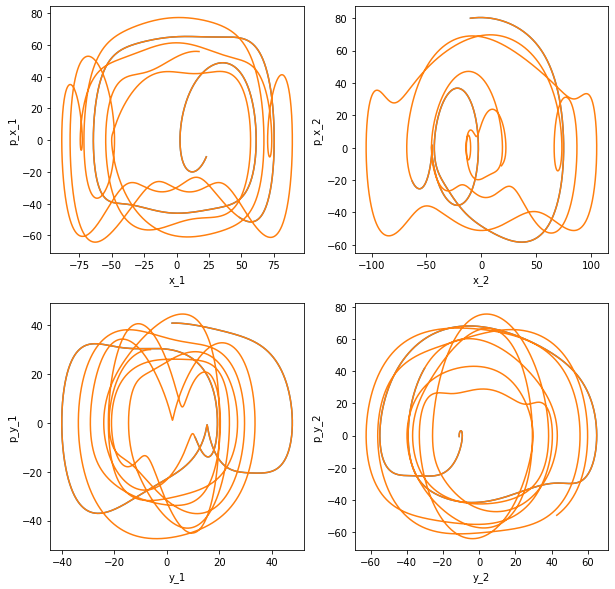

In [284]:
plt.figure(figsize = (10,10))
end = 40
plt.subplot(2,2,1)
plt.plot(time_step_1["x_1"][:end], time_step_1["p_x_1"][:end])
plt.plot(time_step_2["x_1"][:end], time_step_2["p_x_1"][:end])
plt.xlabel("x_1")
plt.ylabel("p_x_1")

plt.subplot(2,2,2)
plt.plot(time_step_1["x_2"][:end], time_step_1["p_x_2"][:end])
plt.plot(time_step_2["x_2"][:end], time_step_2["p_x_2"][:end])
plt.xlabel("x_2")
plt.ylabel("p_x_2")

plt.subplot(2,2,3)
plt.plot(time_step_1["y_1"][:end], time_step_1["p_y_1"][:end])
plt.plot(time_step_2["y_1"][:end], time_step_2["p_y_1"][:end])
plt.xlabel("y_1")
plt.ylabel("p_y_1")

plt.subplot(2,2,4)
plt.plot(time_step_1["y_2"][:end], time_step_1["p_y_2"][:end])
plt.plot(time_step_2["y_2"][:end], time_step_2["p_y_2"][:end])
plt.xlabel("y_2")
plt.ylabel("p_y_2")

In [285]:
def separation(a,b):
    return abs(a.values-b.values)

In [286]:
print(time_step_1.iloc[:,0])
print(time_step_2.iloc[:,0])

0.0000     23.00000000000
0.0001     22.99894989843
0.0002     22.99789959370
0.0003     22.99684908582
0.0004     22.99579837478
                ...      
9.9996     48.61029146975
9.9997     48.60541652865
9.9998     48.60054186048
9.9999     48.59566746532
10.0000    48.59079334326
Name: x_1, Length: 100001, dtype: float64
0.0000     23.00000000000
0.0005     22.99474746067
0.0010     22.98948984209
0.0015     22.98422714371
0.0020     22.97895936495
                ...      
49.9980   -70.25588554296
49.9985   -70.27515926897
49.9990   -70.29440081099
49.9995   -70.31361011332
50.0000   -70.33278712035
Name: x_1, Length: 100001, dtype: float64


In [287]:
time_step_2.iloc[:,0]

0.0000     23.00000000000
0.0005     22.99474746067
0.0010     22.98948984209
0.0015     22.98422714371
0.0020     22.97895936495
                ...      
49.9980   -70.25588554296
49.9985   -70.27515926897
49.9990   -70.29440081099
49.9995   -70.31361011332
50.0000   -70.33278712035
Name: x_1, Length: 100001, dtype: float64

In [288]:
print(separation(time_step_1.iloc[:,0], time_step_2.iloc[:,0]))

[0.00000000e+00 4.20243776e-03 8.40975161e-03 ... 1.18894943e+02
 1.18909278e+02 1.18923580e+02]


ValueError: x and y must have same first dimension, but have shapes (1000001,) and (100001,)

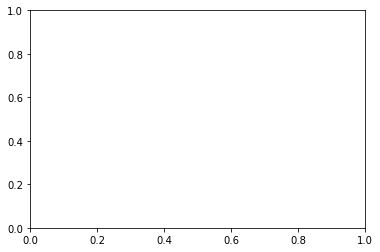

In [289]:
times = np.arange(0,1.000001, .000001)
plt.plot(times, separation(time_step_1.iloc[:,0], time_step_2.iloc[:,0]))

Plot the time evolution of each phase space trajectory

In [ ]:
plt.figure(figsize = (10,10))
t1 = np.arange(1, len(time_step_1["p_x_1"][:end])+1, 1)
t2 = np.arange(1, len(time_step_2["p_x_1"][:end])+1, 1)

plt.subplot(2,2,1)
plt.plot(t1, time_step_1["p_x_1"][:end])
plt.plot(t2*5, time_step_2["p_x_1"][:end])
plt.xlabel("x_1")
plt.ylabel("p_x_1")

plt.subplot(2,2,2)
plt.plot(t1, time_step_1["p_x_2"][:end])
plt.plot(t2*5, time_step_2["p_x_2"][:end])
plt.xlabel("x_2")
plt.ylabel("p_x_2")

plt.subplot(2,2,3)
plt.plot(t1, time_step_1["p_y_1"][:end])
plt.plot(t2*5, time_step_2["p_y_1"][:end])
plt.xlabel("y_1")
plt.ylabel("p_y_1")

plt.subplot(2,2,4)
plt.plot(t1, time_step_1["p_y_2"][:end])
plt.plot(t2*5, time_step_2["p_y_2"][:end])
plt.xlabel("y_2")
plt.ylabel("p_y_2")

### Observe how the trajectories diverge.

2. Instead of looking at how separation of a particular coordinate or
momenta evolves, look at how the distance evolves with time.
E.g. if there is just one coordinate and one momentum, look at how
\sqrt{ (x_1 (t) -x_2(t))^2 +(p_1(t) -p_2(t) )^2 } changes with time.

In [290]:
def separation8_dim(Particle_1, Particle_2):
    
    x_1_a = Particle_1["x_1"]
    x_2_a = Particle_1["x_2"]
    y_1_a = Particle_1["y_1"]
    y_2_a = Particle_1["y_2"]
    p_x_1_a = Particle_1["p_x_1"]
    p_x_2_a = Particle_1["p_x_2"]
    p_y_1_a = Particle_1["p_y_1"]
    p_y_2_a =Particle_1["p_y_2"]
    x_1_b = Particle_2["x_1"]
    x_2_b = Particle_2["x_2"]
    y_1_b = Particle_2["y_1"]
    y_2_b = Particle_2["y_2"]
    p_x_1_b = Particle_2["p_x_1"]
    p_x_2_b = Particle_2["p_x_2"]
    p_y_1_b = Particle_2["p_y_1"]
    p_y_2_b = Particle_2["p_y_2"]

    
    return np.sqrt((x_1_a -x_1_b)**2 + (y_1_a - y_1_b)**2 + (p_x_1_a - p_x_1_b)**2 + (p_y_1_a - p_y_1_b)**2 +
                  (x_2_a -x_2_b)**2 + (y_2_a - y_2_b)**2 + (p_x_2_a - p_x_2_b)**2 + (p_y_2_a - p_y_2_b)**2)

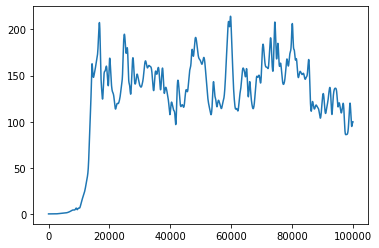

In [291]:
seps = separation8_dim(Particle_1, Particle_2)
plt.plot(np.arange(0,len(seps),1), seps)

ValueError: x and y must have same first dimension, but have shapes (1000001,) and (100001,)

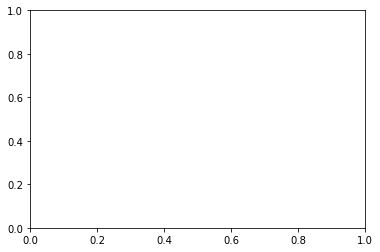

In [292]:
seps_0 = separation8_dim(Particle_1.iloc[0,:], Particle_2.iloc[0,:])
plt.plot(times, np.log( seps))

**It is a good idea to plot the logarithm of this separation versus
time. This would be \lambda_L(t), i.e. Lyapunov exponent as a function
of time. If it saturates to some value, that is the actual Lyapunov
exponent.**


3. For the 3rd example, compute \lambda_L(t) for some 20-30 examples,
all with same energy.
Plot them on the same graph.
Also plot their average and check if it saturates faster than
individual \lambda_L(t)-s